In [146]:
import sklearn

In [147]:
from sklearn.datasets import make_circles

# make n_samples
n_samples = 1000

# create circle datasets
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [148]:
len(X), len(y)

(1000, 1000)

In [149]:
list(zip(X[:5], y[:5]))

[(array([0.75424625, 0.23148074]), 1),
 (array([-0.75615888,  0.15325888]), 1),
 (array([-0.81539193,  0.17328203]), 1),
 (array([-0.39373073,  0.69288277]), 1),
 (array([ 0.44220765, -0.89672343]), 0)]

In [150]:
# Make a pandas dataframe
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

In [151]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


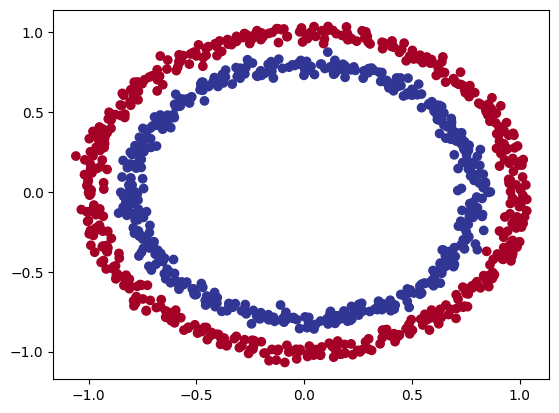

In [152]:
# visualise
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

## check i/o shapes

In [153]:
import torch

In [154]:
X.shape, y.shape

((1000, 2), (1000,))

In [155]:
X[0], y[0], X[0].shape, y[0].shape

(array([0.75424625, 0.23148074]), 1, (2,), ())

In [156]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [157]:
## turn data to tensors, create train, tests splits
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
type(X), type(y)


(torch.Tensor, torch.Tensor)

In [158]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [159]:
## split into train, test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [160]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [161]:
(len(X_train), len(X_test)), len(y_test), len(y_train)

((800, 200), 200, 800)

## build model
- classify blue and red dots ussing a NN model
- setup device agnostic code
- construct a model by subclassing nn.Module
- Define a loss func and an optimizer
- create a training and testing loop


In [162]:
import torch
from torch import nn
# device agnostice code
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.__version__, device

('2.0.0', 'cpu')

In [163]:
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

Create a model:
- subclass nn.Module
- create 2 nn.Linear layers such that they are compatible with the data shapes
- define (overide) the forward method outlining the. forward computation of the model
- instantiate an instance of the model class and sent it to the target device 

In [164]:
# construct the model
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # create linear layers
        #self.layer_1 = nn.Linear(in_features=2, out_features=5) # layer 1
        #self.layer_2 = nn.Linear(in_features=5, out_features=1) # layer 2

        self.two_linear_layers = nn.Sequential(
            nn.Linear(2, 5),
            nn.Linear(5, 1)
        )
    
    def forward(self, x):
        return self.two_linear_layers(x) # x -> layer 1 -> layer 

In [165]:

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [166]:
model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('two_linear_layers.0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('two_linear_layers.1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('two_linear_layers.1.bias', tensor([-0.2060]))])

In [167]:
list(model_0.parameters()), list(model_0.parameters())[0].device

([Parameter containing:
  tensor([[ 0.5406,  0.5869],
          [-0.1657,  0.6496],
          [-0.1549,  0.1427],
          [-0.3443,  0.4153],
          [ 0.6233, -0.5188]], requires_grad=True),
  Parameter containing:
  tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], requires_grad=True),
  Parameter containing:
  tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], requires_grad=True),
  Parameter containing:
  tensor([-0.2060], requires_grad=True)],
 device(type='cpu'))

In [168]:
## build using sequential the same model
model_0 = nn.Sequential(
    nn.Linear(2, 5),
    nn.Linear(5, 1)
).to(device)

model_0 # same model as above

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [169]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [170]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
untrained_preds.shape, len(X_test)

(torch.Size([200, 1]), 200)

In [171]:
list(zip(untrained_preds[:10], y_test[:10]))

[(tensor([-0.0338]), tensor(1.)),
 (tensor([-0.0309]), tensor(0.)),
 (tensor([0.0894]), tensor(1.)),
 (tensor([-0.0692]), tensor(0.)),
 (tensor([0.2967]), tensor(1.)),
 (tensor([0.2968]), tensor(1.)),
 (tensor([0.1405]), tensor(0.)),
 (tensor([0.2178]), tensor(0.)),
 (tensor([0.0805]), tensor(1.)),
 (tensor([-0.0284]), tensor(0.))]

### setup loss function and optimizer

In [172]:
#loss = nn.BCELoss() # requirs the final layer to have gone through Sigmoid activation
loss_fn = nn.BCEWithLogitsLoss() # this has Sigmoid activation func built in - miore numerically stable

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [173]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

# evaluation metrics for classification
- accuracy


In [174]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [175]:
#torch.round(untrained_preds).sum() # wrong to do this - these logitd have to go through a sigmoid layers

In [176]:
accuracy_fn(y_test, untrained_preds)

0.0

## Train Model

- fwd pass
- calc loss
- optimizer zero grad
- loss.backward
- optimizer.step()

Outputs of our model are logits. These logits needs to be converted into probabilities by passing them through some kind of activation. (sigmoid layer for BC and softmax layer for Multi class)



In [177]:
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))


In [178]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

In [179]:
# predicted labels
y_preds = torch.round(y_pred_probs)
y_preds.shape, 

(torch.Size([200, 1]),)

In [180]:
accuracy_fn(y_test, y_preds.squeeze())

57.49999999999999

In [181]:
## building a training and test loop:
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

""" print(f"train X: {X_train.shape}")
print(f"train y: {y_train.shape}")
print(f"test X: {X_test.shape}")
print(f"test y: {y_test.shape}") """

for epoch in range(epochs):
    #### Training
    model_0.train()

    ## fwd pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    ## calc  loss
    #loss = loss_fn(torch.sigmopid(y_logits), y_train) ## with loss_fn = nn.BCELoss()
    loss = loss_fn(y_logits, y_train) ## BCEWithLogitsLoss()
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    

    # zero grad
    optimizer.zero_grad()

    #bp
    loss.backward()

    # optimizer step
    optimizer.step()

    #### Testing
    model_0.eval()

    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        #print(y_true.shape, y_pred.)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | training loss: {loss} | training acc: {acc} | test loss: {test_loss} | test acc: {test_acc}")

Epoch: 0 | training loss: 0.6979604959487915 | training acc: 51.87500000000001 | test loss: 0.6945955753326416 | test acc: 57.49999999999999
Epoch: 10 | training loss: 0.6976765394210815 | training acc: 52.0 | test loss: 0.6943801045417786 | test acc: 57.99999999999999
Epoch: 20 | training loss: 0.6974151134490967 | training acc: 52.0 | test loss: 0.6941847205162048 | test acc: 57.49999999999999
Epoch: 30 | training loss: 0.697174072265625 | training acc: 52.0 | test loss: 0.6940073370933533 | test acc: 56.49999999999999
Epoch: 40 | training loss: 0.6969515085220337 | training acc: 51.625 | test loss: 0.6938462853431702 | test acc: 56.49999999999999
Epoch: 50 | training loss: 0.696745753288269 | training acc: 51.37500000000001 | test loss: 0.6937000155448914 | test acc: 56.00000000000001
Epoch: 60 | training loss: 0.6965552568435669 | training acc: 51.37500000000001 | test loss: 0.6935670971870422 | test acc: 56.00000000000001
Epoch: 70 | training loss: 0.696378767490387 | training acc

In [182]:
from pathlib import Path
import requests

file_to_check = "helper_functions.py"
target_path = Path.cwd() / "pytorch-deep-learning-main" / "my_notebooks" / file_to_check
target_path.parent.mkdir(parents=True, exist_ok=True)

if target_path.is_file():
    print("helper exists: move on")
else:
    print(f"Downloading to {target_path}")
    resp = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py",
        timeout=10,
    )
    resp.raise_for_status()
    target_path.write_bytes(resp.content)


helper exists: move on


In [183]:
from helper_functions import plot_predictions, plot_decision_boundary

In [184]:
(Path.cwd() / "pytorch-deep-learning-main" / file_to_check).is_file()

True

In [185]:
path_2_helper = (Path.cwd() / "pytorch-deep-learning-main" / "my_notebooks" / file_to_check).is_file()
path_2_helper

True

In [186]:
""" def project_root():
    p = Path.cwd().resolve()
    for parent in [p] + list(p.parents):
        if (parent / ".git").exists():
            return parent
    return p  # fallback

root = project_root()
root """

' def project_root():\n    p = Path.cwd().resolve()\n    for parent in [p] + list(p.parents):\n        if (parent / ".git").exists():\n            return parent\n    return p  # fallback\n\nroot = project_root()\nroot '

In [187]:
Path.cwd()

PosixPath('/Users/sauravkrishna/Documents/Python_stuffs/projects/deep_learning_ninja')

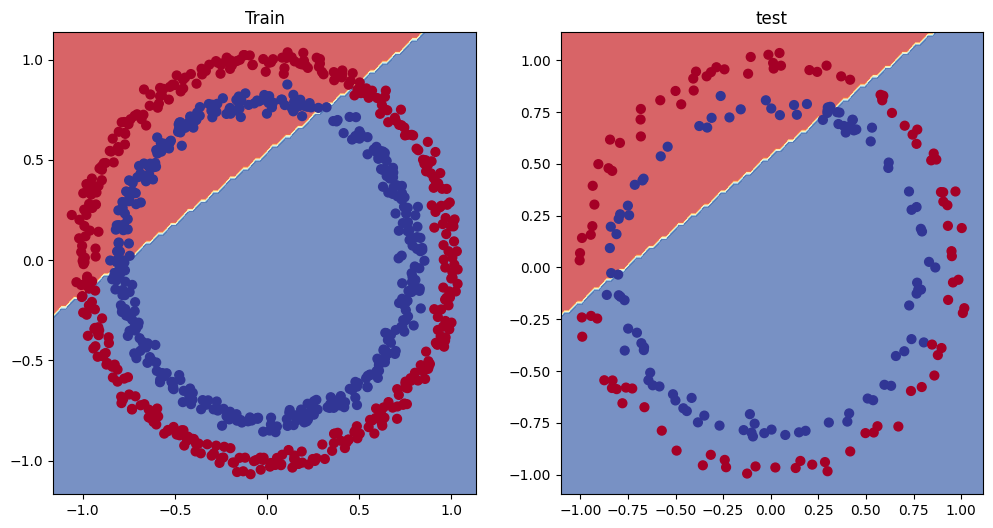

In [188]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

In [189]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 10)
        self.layer_2 = nn.Linear(10, 10)
        self.layer_3 = nn.Linear(10, 1)
    
    def forward(self, x):
        #x = self.layer_1(x)
        #x = self.layer_2(x)
        return self.layer_3(self.layer_2(self.layer_1(x)))


In [190]:
model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [191]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732],
                      [-0.5424,  0.5802],
                      [ 0.2037,  0.2929],
                      [ 0.2236, -0.0123],
                      [ 0.5534, -0.5024],
                      [ 0.0445, -0.4826]])),
             ('layer_1.bias',
              tensor([ 0.2180, -0.2435,  0.2167, -0.1473,  0.5865, -0.4191, -0.4217, -0.4217,
                       0.6360,  0.2356])),
             ('layer_2.weight',
              tensor([[ 0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,  0.1132,  0.2628,
                       -0.1633, -0.2156],
                      [ 0.1678, -0.1278,  0.1919, -0.0750,  0.1809, -0.2457, -0.1596,  0.0964,
                        0.0669, -0.0806],
                      [ 0.1885,  0.2150, -0.2293, -0.1688,  0.2896, -0.1

In [192]:
# loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)


In [193]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### training ###
    model_1.train()
    # fwd pass
    y_logits = model_1(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_preds)

    # zero grad
    optimizer.zero_grad()

    # backprop
    loss.backward()

    # optimizer step
    optimizer.step()

    ##### testing ####
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        # test loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | training loss: {loss} | training acc: {acc} | test loss: {test_loss} | test acc: {test_acc}%")




Epoch: 0 | training loss: 0.6971261501312256 | training acc: 50.0 | test loss: 0.695935845375061 | test acc: 50.0%
Epoch: 10 | training loss: 0.6948977112770081 | training acc: 50.0 | test loss: 0.6942470073699951 | test acc: 50.0%
Epoch: 20 | training loss: 0.6940507292747498 | training acc: 54.625 | test loss: 0.6936601400375366 | test acc: 54.0%
Epoch: 30 | training loss: 0.6937075257301331 | training acc: 51.24999999999999 | test loss: 0.6934545040130615 | test acc: 56.00000000000001%
Epoch: 40 | training loss: 0.693550169467926 | training acc: 49.75 | test loss: 0.6933786869049072 | test acc: 55.50000000000001%
Epoch: 50 | training loss: 0.693463921546936 | training acc: 49.875 | test loss: 0.6933475732803345 | test acc: 55.00000000000001%
Epoch: 60 | training loss: 0.693406879901886 | training acc: 49.5 | test loss: 0.6933334469795227 | test acc: 54.50000000000001%
Epoch: 70 | training loss: 0.6933639049530029 | training acc: 49.5 | test loss: 0.693327784538269 | test acc: 54.500

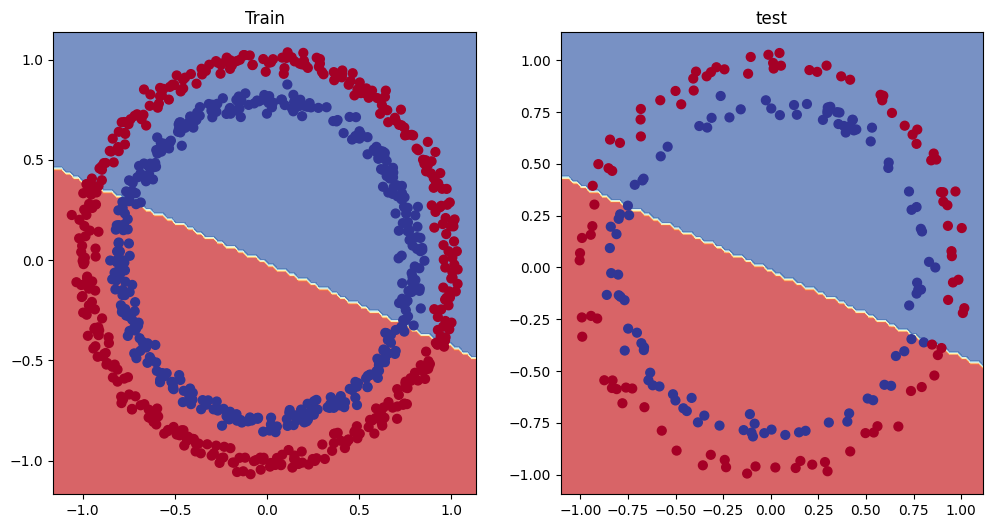

In [194]:

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)

In [195]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

len(X_regression), len(y_regression)

(100, 100)

In [196]:
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

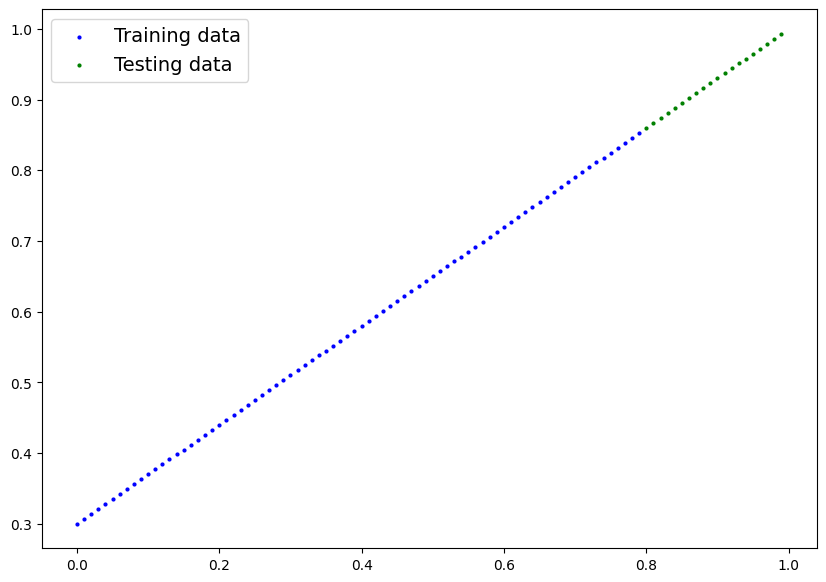

In [197]:
plot_predictions(train_data=X_train_regression,
                train_labels = y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression)

In [198]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [199]:
### model_1 has 2 input features whereas our regression problem has only 1 
## adjust the number of in_features of layer-1
model_2 = nn.Sequential(
    nn.Linear(1, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 1)
).to(device)

In [200]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [201]:
## loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)
loss, optimizer

(tensor(0.6930, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [202]:
torch.manual_seed(42)

epochs = 1000
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)  # or Adam

for epoch in range(epochs):
    ### Terainig
    model_2.train()

    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
    
    if epoch % 100 == 0:
        print(f"epoch: {epoch} | training loss: {loss} | test loss: {test_loss} | ")

epoch: 0 | training loss: 0.7598584890365601 | test loss: 0.9110288619995117 | 
epoch: 100 | training loss: 0.02857953868806362 | test loss: 0.0008127152686938643 | 
epoch: 200 | training loss: 0.025325387716293335 | test loss: 0.0020919442176818848 | 
epoch: 300 | training loss: 0.021374741569161415 | test loss: 0.0030507862102240324 | 
epoch: 400 | training loss: 0.019644882529973984 | test loss: 0.003407529089599848 | 
epoch: 500 | training loss: 0.019402239471673965 | test loss: 0.003872361732646823 | 
epoch: 600 | training loss: 0.01903245784342289 | test loss: 0.0037889808882027864 | 
epoch: 700 | training loss: 0.018782977014780045 | test loss: 0.003813359187915921 | 
epoch: 800 | training loss: 0.01839747652411461 | test loss: 0.0032873929012566805 | 
epoch: 900 | training loss: 0.017980346456170082 | test loss: 0.003603774355724454 | 


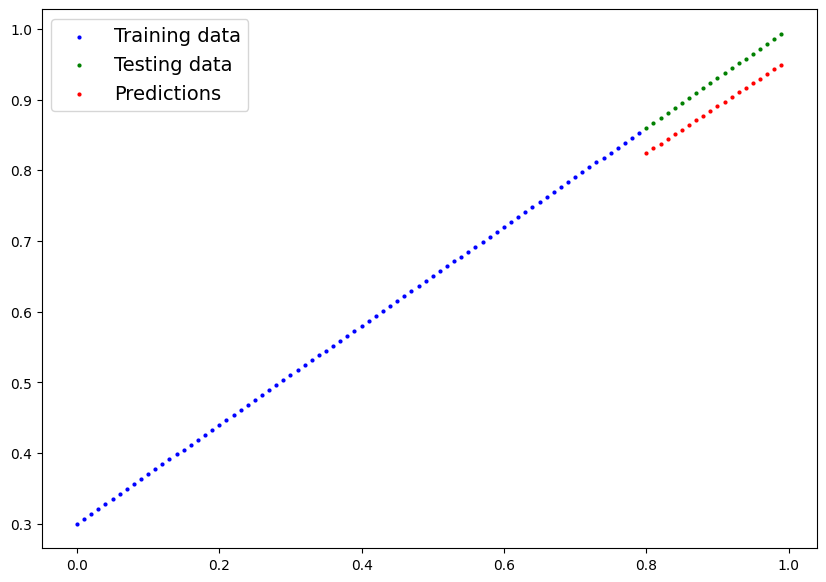

In [203]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
plot_predictions(train_data=X_train_regression,
                train_labels = y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression,
                predictions=y_preds)

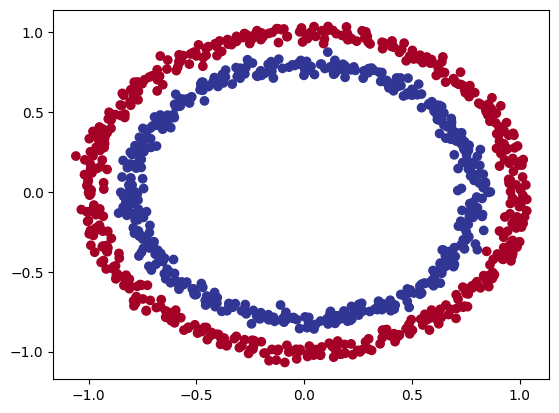

In [204]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [205]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [206]:
list(zip(X_train[:5], y_train[:5]))

[(tensor([ 0.6579, -0.4651]), tensor(1.)),
 (tensor([ 0.6319, -0.7347]), tensor(0.)),
 (tensor([-1.0086, -0.1240]), tensor(0.)),
 (tensor([-0.9666, -0.2256]), tensor(0.)),
 (tensor([-0.1666,  0.7994]), tensor(1.))]

In [207]:
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 10)
        self.layer_2 = nn.Linear(10, 10)
        self.layer_3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


In [208]:
model_3 = CircleModelV2()
model_3.to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [209]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

In [210]:
torch.manual_seed(42)
epochs = 500


X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    #### Training ###
    model_3.train()

    y_logits = model_3(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_preds)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    ### Testing ###
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 100 == 0:
        print(f"epoch: {epoch} | train loss: {loss} | train accuracy: {acc} | test loss: {test_loss} | test accuracy: {test_acc}")


epoch: 0 | train loss: 0.6929463148117065 | train accuracy: 50.0 | test loss: 0.6932452917098999 | test accuracy: 50.0
epoch: 100 | train loss: 0.6924796104431152 | train accuracy: 50.375 | test loss: 0.6926425099372864 | test accuracy: 50.0
epoch: 200 | train loss: 0.6922479271888733 | train accuracy: 59.0 | test loss: 0.6923322081565857 | test accuracy: 56.00000000000001
epoch: 300 | train loss: 0.6920937299728394 | train accuracy: 70.125 | test loss: 0.6921403408050537 | test accuracy: 67.0
epoch: 400 | train loss: 0.6919493079185486 | train accuracy: 68.375 | test loss: 0.6919655799865723 | test accuracy: 70.0


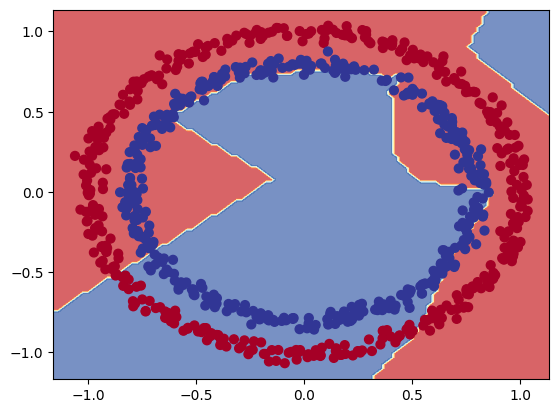

In [211]:
plot_decision_boundary(model_3, X_train, y_train)

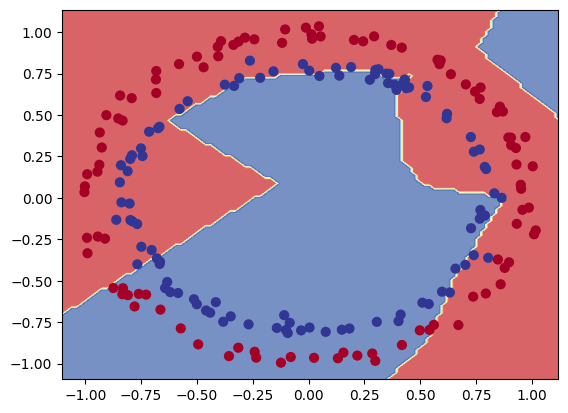

In [212]:
plot_decision_boundary(model_3, X_test, y_test)

In [213]:
## Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:5], y_test[:5]

(tensor([0., 0., 0., 0., 1.]), tensor([1., 0., 1., 0., 1.]))

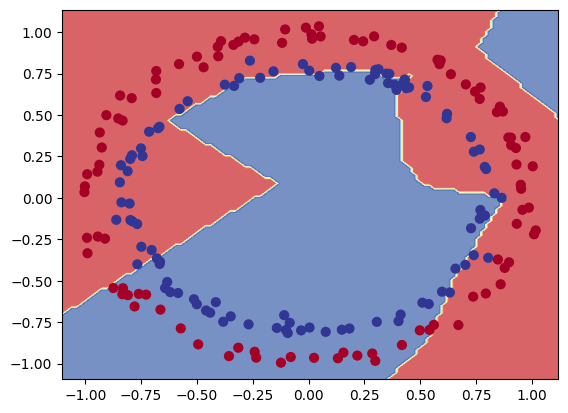

In [214]:
plot_decision_boundary(model_3, X_test, y_test)

## Replicating non-linear activation funcs

In [215]:
A = torch.arange(-10, 10, 1, dtype=torch.float)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

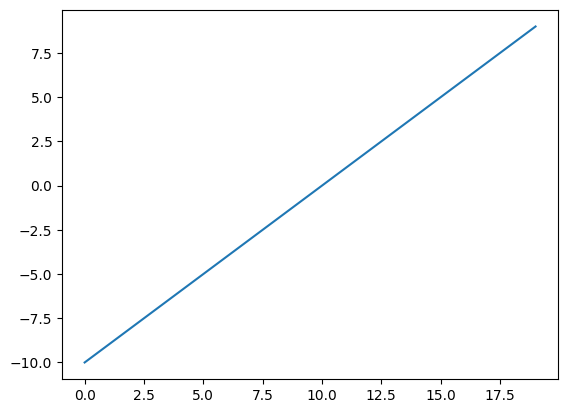

In [216]:
plt.plot(A);

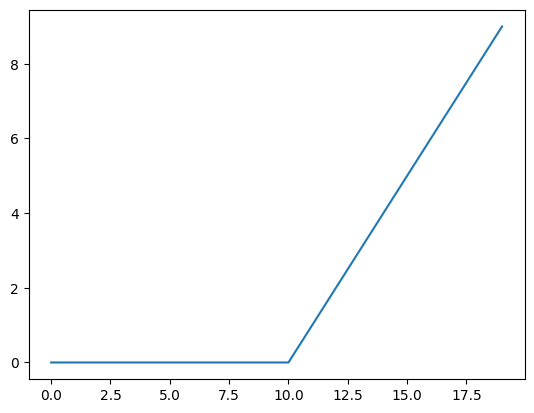

In [217]:
plt.plot(torch.relu(A));

In [218]:
def relu(x: torch.tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

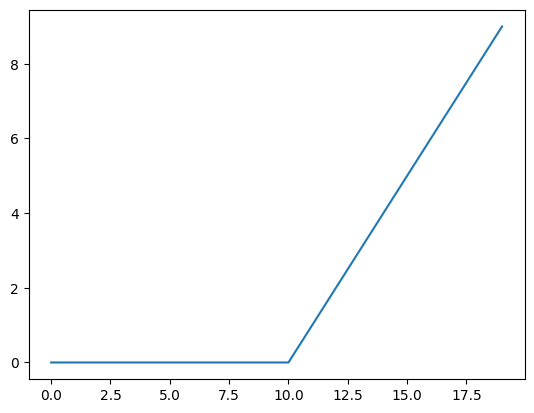

In [219]:
plt.plot(relu(A))

In [220]:
def sigmoid(x):
    return 1 / ( 1 + torch.exp(-x))

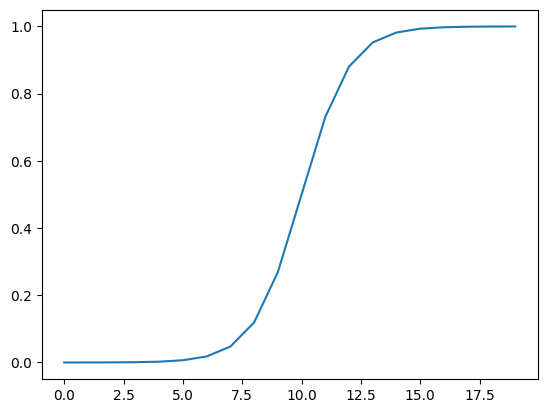

In [221]:
plt.plot(torch.sigmoid(A))

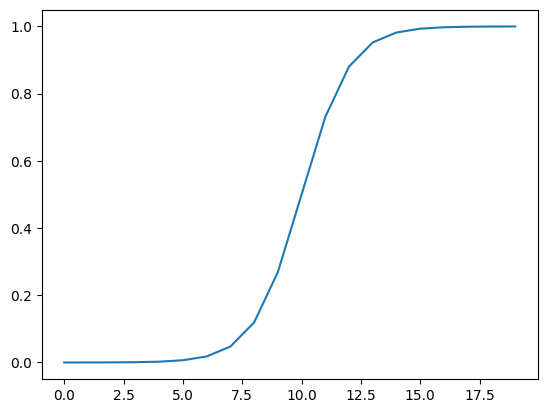

In [222]:
plt.plot(sigmoid(A))

## Multi Class classification

### build data

In [223]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Generate blobs
X_blob, y_blob = make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5,
    random_state=RANDOM_SEED,
)

# To tensors
X_blob = torch.from_numpy(X_blob).float()
y_blob = torch.from_numpy(y_blob).long()  # use long if you'll feed into CrossEntropyLoss

# Train/test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED
)

X_blob_train.shape, y_blob_train.shape, X_blob_test.shape, y_blob_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [224]:
list(zip(X_blob_train[:5], y_blob_train[:5]))

[(tensor([5.0405, 3.3076]), tensor(1)),
 (tensor([-2.6249,  9.5260]), tensor(0)),
 (tensor([-8.5240, -9.0402]), tensor(2)),
 (tensor([-6.0262, -4.4375]), tensor(2)),
 (tensor([-3.3397,  7.2175]), tensor(0))]

In [225]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

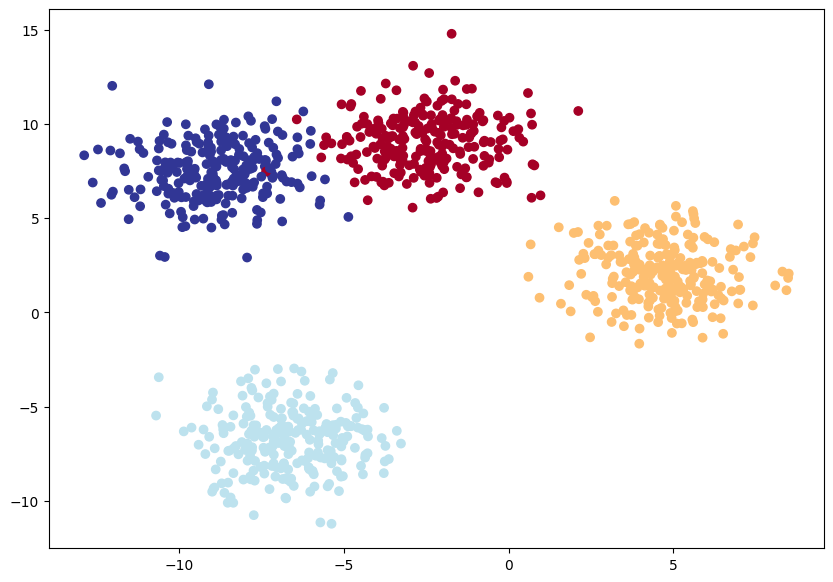

In [226]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [227]:
device = "cude" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [228]:
from torch import nn
class BlobsModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
           nn.Linear(input_features, hidden_units),
           nn.ReLU(),
           nn.Linear(hidden_units, hidden_units),
           nn.ReLU(),
           nn.Linear(hidden_units, output_features) 
        )
        
    
    def forward(self, x):
        return self.linear_layer_stack(x)

model_4 = BlobsModel(input_features=2, 
                     output_features=4, 
                     hidden_units=8).to(device)
model_4

BlobsModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [229]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


Model outputs logits 
logits -> Softmax(logits) gives pred probs -> argmax gives the pred labels

In [230]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test).to(device)
y_logits[:5]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])

In [231]:
""" softmax = nn.Softmax(dim=1)
softmax(y_out), torch.softmax(y_out, dim=1)
 """

' softmax = nn.Softmax(dim=1)\nsoftmax(y_out), torch.softmax(y_out, dim=1)\n '

In [232]:
""" torch.softmax(y_out, dim=1).sum(dim=1, keepdim=True) """

' torch.softmax(y_out, dim=1).sum(dim=1, keepdim=True) '

In [233]:
""" torch.argmax(torch.softmax(y_out, dim=1), dim=1) """

' torch.argmax(torch.softmax(y_out, dim=1), dim=1) '

In [234]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])

In [235]:
y_pred_probs.sum(dim=1, keepdim=True)[:5]

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000]])

In [236]:
## prediction labels take argmax
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [243]:
torch.manual_seed(42)
epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    # ---- Train ----
    model_4.train()

    y_logits = model_4(X_blob_train)
    loss = loss_fn(y_logits, y_blob_train)

    optimizer.zero_grad()              # <-- FIX
    loss.backward()
    optimizer.step()

    y_pred = y_logits.argmax(dim=1)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    # ---- Test ----
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_loss = loss_fn(test_logits, y_blob_test)

        test_pred = test_logits.argmax(dim=1)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"epoch: {epoch} | train loss: {loss.item():.4f} | acc: {acc:.2f} | "
              f"test loss: {test_loss.item():.4f} | test acc: {test_acc:.2f}")


epoch: 0 | train loss: 0.0234 | acc: 99.25 | test loss: 0.0122 | test acc: 99.50
epoch: 10 | train loss: 0.0234 | acc: 99.25 | test loss: 0.0121 | test acc: 99.50
epoch: 20 | train loss: 0.0233 | acc: 99.25 | test loss: 0.0121 | test acc: 99.50
epoch: 30 | train loss: 0.0233 | acc: 99.25 | test loss: 0.0121 | test acc: 99.50
epoch: 40 | train loss: 0.0233 | acc: 99.25 | test loss: 0.0120 | test acc: 99.50
epoch: 50 | train loss: 0.0232 | acc: 99.25 | test loss: 0.0120 | test acc: 99.50
epoch: 60 | train loss: 0.0232 | acc: 99.25 | test loss: 0.0119 | test acc: 99.50
epoch: 70 | train loss: 0.0232 | acc: 99.25 | test loss: 0.0119 | test acc: 99.50
epoch: 80 | train loss: 0.0231 | acc: 99.25 | test loss: 0.0119 | test acc: 99.50
epoch: 90 | train loss: 0.0231 | acc: 99.25 | test loss: 0.0118 | test acc: 99.50


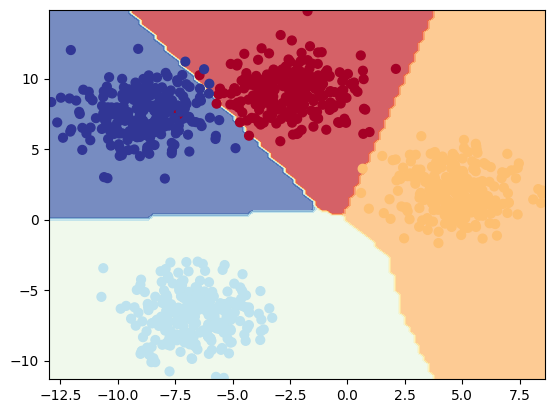

In [245]:
model_4.eval()
with torch.inference_mode():
    plot_decision_boundary(model_4, X_blob, y_blob)

In [246]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_logits[:5]

tensor([[ -1.8881,  10.1054,  -9.9442, -11.0518],
        [ -2.3268,  -8.9178,  -5.8615,   4.9625],
        [ -4.9221,  -5.3191,   5.1093,  -4.0726],
        [ -2.5848,   7.4348,  -5.3005,  -6.4689],
        [  6.1903,  -2.4154, -11.9246,  -8.5600]])

In [247]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[6.1837e-06, 9.9999e-01, 1.9613e-09, 6.4793e-10],
        [6.8234e-04, 9.3667e-07, 1.9903e-05, 9.9930e-01],
        [4.3989e-05, 2.9575e-05, 9.9982e-01, 1.0286e-04],
        [4.4517e-05, 9.9995e-01, 2.9452e-06, 9.1552e-07],
        [9.9982e-01, 1.8302e-04, 1.3573e-08, 3.9259e-07]])

In [ ]:
list(zip(y_pred_probs.argmax(dim=1).data, y_blob_test.data))[:25]

[(tensor(1), tensor(1)),
 (tensor(3), tensor(3)),
 (tensor(2), tensor(2)),
 (tensor(1), tensor(1)),
 (tensor(0), tensor(0)),
 (tensor(3), tensor(3)),
 (tensor(2), tensor(2)),
 (tensor(0), tensor(0)),
 (tensor(2), tensor(2)),
 (tensor(0), tensor(0)),
 (tensor(0), tensor(0)),
 (tensor(1), tensor(1)),
 (tensor(0), tensor(0)),
 (tensor(0), tensor(0)),
 (tensor(0), tensor(0)),
 (tensor(3), tensor(3)),
 (tensor(3), tensor(3)),
 (tensor(2), tensor(2)),
 (tensor(3), tensor(3)),
 (tensor(3), tensor(3)),
 (tensor(3), tensor(3)),
 (tensor(0), tensor(0)),
 (tensor(1), tensor(1)),
 (tensor(2), tensor(2)),
 (tensor(2), tensor(2))]

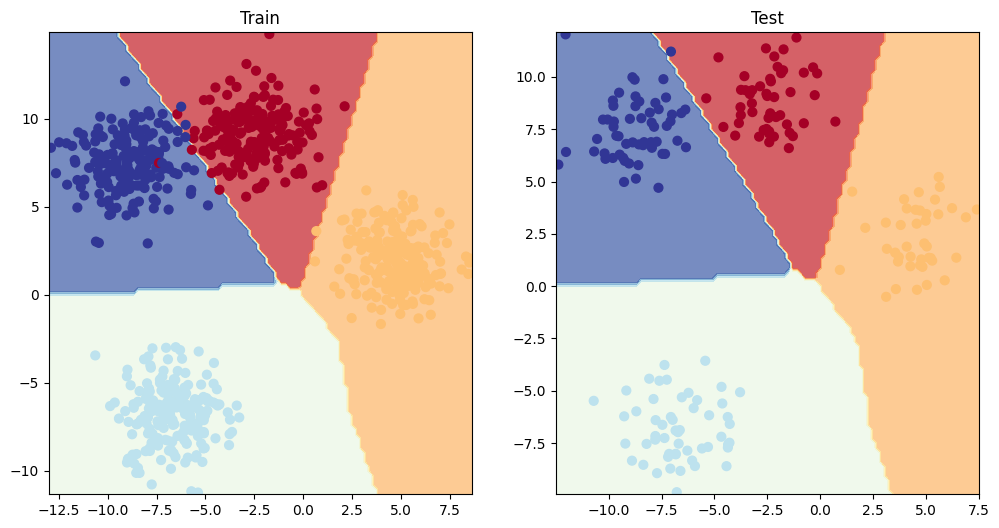

In [252]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

- Accuracy - out of 100, how many our model got right?
- Precision
- Recall
- F1-score
- Confusion Matrix
- Classification Report

https://medium.com/data-science/beyond-accuracy-precision-and-recall-3da06bea9f6c